In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/Taitanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 항상 찍어보고 시작하기 (head, info, describe)

# 📚 척도의 종류 (Measurement Scales) 정리

| 척도 구분 | 특징 | 예시 | 타이타닉 데이터 예시 | 데이터 유형 |
|:--|:--|:--|:--|:--|
| **명목척도 (Nominal Scale)** | - 분류만 가능<br>- 서열 없음<br>- 수학적 연산 불가 | 성별, 지역, 혈액형, 선호도 등 | 성별 (male, female), 승선 항구 (C, Q, S) | 범주형 (Categorical) |
| **순서척도 (Ordinal Scale)** | - 분류 가능 + 서열 있음<br>- 크기 차이는 불명확<br>- 덧셈, 뺄셈 불가 | 선호도(1순위, 2순위...), 학년, 고객 만족도 등 | 선실 등급 (1st, 2nd, 3rd) | 범주형 (Categorical, 서열형) |
| **구간척도 (Interval Scale)** | - 분류 가능 + 서열 있음 + 간격 의미 있음<br>- 절대 0이 없음<br>- 비율 계산 불가 | 온도(섭씨), 지수(IQ 등) | 탑승객 만족 점수 (0~100 점) [가정] | 수치형 (Numerical) |
| **비율척도 (Ratio Scale)** | - 분류 가능 + 서열 있음 + 간격 의미 + 절대 0 존재<br>- 사칙연산 모두 가능 (비율 연산 가능) | 키, 몸무게, 나이, 수입, 점수 | 나이 (Age), 운임 요금 (Fare), 형제/배우자 수 (SibSp), 부모/자식 수 (Parch) | 수치형 (Numerical) |


In [5]:
# 컴퓨터는 높은 수가 더 우월하다 판단하지만
# 선실등급을 뜻하는 숫자의 경우 우열을 가리지못함 
# 역 인코딩을 해야하는 경우 (회귀)도 생긴다
1 > 3 # 1등실이 3등실보다 크다고하면 False나옴

False

**타이타닉 변수**
| 변수명  | 척도 종류 | 이유 |
|:-------|:---------|:-----|
| `Sex` (성별) | 명목척도 | 남자, 여자 구분만 가능. 남자가 여자보다 크다거나 작다는 개념 없음. |
| `Embarked` (승선항구) | 명목척도 | 탑승한 항구(C=쉘버그, Q=퀸스타운, S=사우샘프턴)는 단순 구분일 뿐, 크고 작음이 없음. |
| `Pclass` (선실 등급) | 순서척도 | 1등실 > 2등실 > 3등실 로 서열은 존재하지만, 1등실과 2등실 간 '차이'가 2등실과 3등실 간 '차이'와 같은지는 알 수 없음. |
| `Age` (나이) | 비율척도 | 0세가 절대적 기준, 나이의 비율 계산 가능 (20살은 10살의 2배). |
| `Fare` (운임) | 비율척도 | 0원이 절대적 기준, 100파운드는 50파운드의 2배. |
| `SibSp`, `Parch` (형제/배우자, 부모/자식 수) | 비율척도 | 0이 기준이고, 숫자 간 비율 의미 있음. |

# 이상값 탐지
- 이상값: 데이터의 집합에서 다른 값들과 뚜렷하게 다른값
- 통계적으로 평균을 왜곡 -> 모델의 결과를 왜곡
- 전체 데이터 분포에서 **정상 범위**에 속하지 않는 데이터

## 이상값 탐지법 3가지
1. Z-score가 -3 <= 범위 =<3를 넘어가는 경우
    - 극단적 이상값을 탐지
2. 평균을 기준으로 평균에서 ±(3×표준편차)를 넘는 경우
    - 표준편차가 큰 경우는 못잡음
3. IQR(사분위수)기준으로 계산한 상위 하위 이상값을 넘는 경우
    - 가장 대표적 방법. 정규&비정규 분포 모두 잘 잡음

## 1)  Z-score로 이상값 탐지하기

## 2) 평균과 표준편차를 이용한 이상값 찾기 ESD <br>(Extreme Sudenized Deviation)
- 평균±(3표준편차) $({\mu\pm 3 \sigma})
    - mu가 평균 sigma가 표준편차
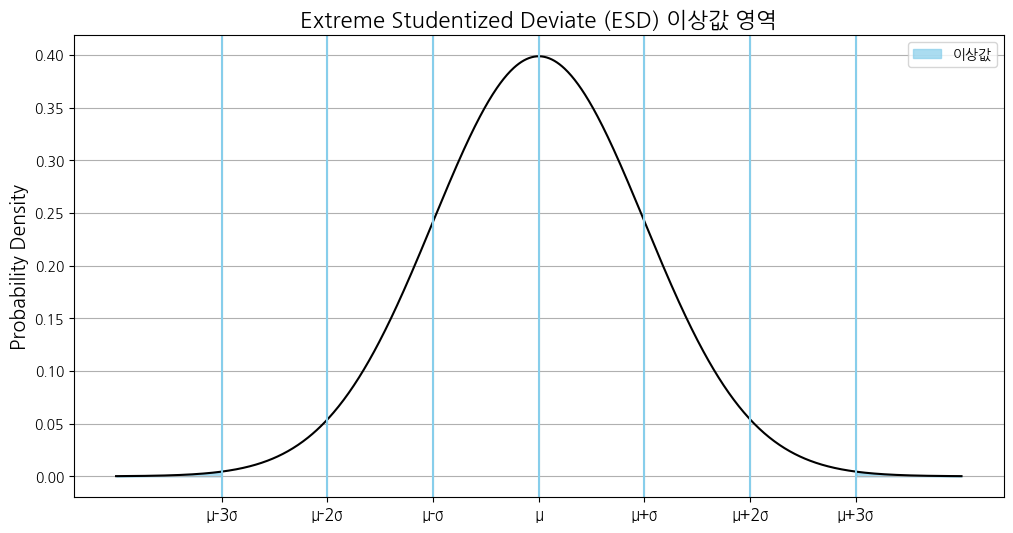

In [6]:
# 평균
mean_fare = data['Fare'].mean()

In [7]:
# 표준편차
std_fare = data['Fare'].std
# 하한가
lower_bound = mean_fare - 3*std_fare
# 상한가
upper_bound = mean_fare + (3*std_fare)

print(lower_bound)
print(upper_bound)

TypeError: unsupported operand type(s) for *: 'int' and 'method'

In [ ]:
outlier_esd=data[data['Fare']>upper_bound]
print("outlier_esd:",len(outlier_esd))
print("outlier_esd:", outlier_esd['Fare'].min())

In [ ]:
data['Fare'].plot(kind='hist') # 히스토그램 그려보면 치우친 그래프가 나옴

데이터분포가 정규분포의 형태일때 사용하는게 Z스코어 방법이므로, 이 데이터에서는 사용할 수 없음. 이상값이 211인건 500파운드 대의 outlier가 있기 때문. 그래서 상향됨.

## 3) IQR(사분위 수)를 이용한 이상값 탐지
### (1) IQR이란?
- IQR은 데이터의 중간 50% 구간의 길이
- IQR은 데이터의 4가지 분위 (0, 25, 50, 75, 100)
    - Q1: 0~25% 구간
    - Q2: 25~50% 구간
    - Q3: 50~75% 구간
    - Q4: 75~100% 구간
- IQR공식:  = 전체데이터의 50%을 차지 (정상범위)
### (2) IQR로 이상값을 찾는 이유?
- 평균과 표준편차는 극단적인 값에 민감<br> 왜곡이있다면 전체적 왜곡 발생
- IQR은 중간값에 기반하므로 outlier의 영향을 덜 받음
- 정규분포가 아닌 데이터에서도 이상치를 잘 찾을 수 있음
### (3) IQR 기반 이상값 판정 기준
- 하한값: Q1(25%) - (1.5 × (Q3 - Q1))
    - Q3(75%)-Q1(25%)
- 상한값: Q3(75%) + (1.5 × (Q3 - Q1))
- **이기준을 초과하여 벗어날경우 이상값으로 판정**
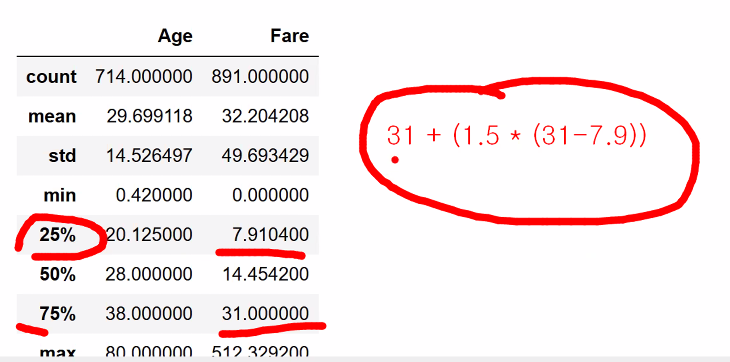

In [ ]:
data.describe() # 4분위수 - 모든 컬럼에 대한.

In [ ]:
# Age 컬럼의 상하한값
data[['Age','Fare']].describe() 

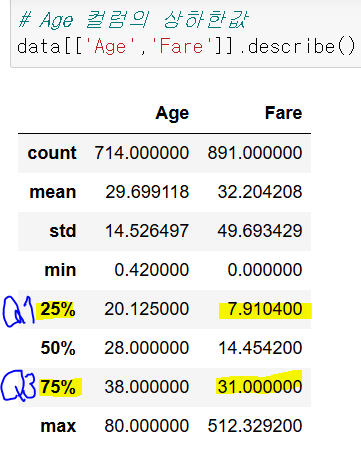


In [8]:
minimum= 7.9 - (1.5*(31-7.9))
maximum= 7.9 - (1.5*(31-7.9))
print(minimum, maximum)

-26.750000000000007 -26.750000000000007


<Axes: ylabel='Frequency'>

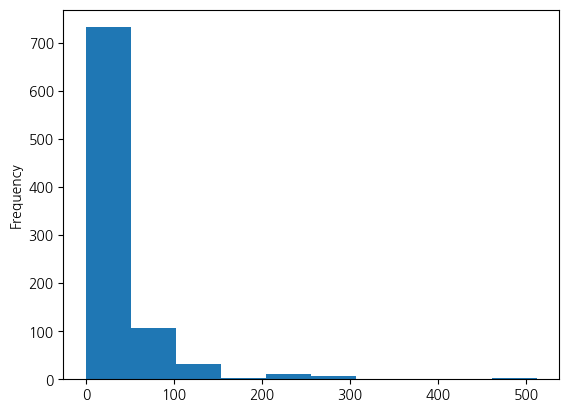

In [9]:
data['Fare'].plot(kind="hist")

- describe값을 이용해 계산

In [10]:
titanic_desc = data[['Age','Fare']].describe()
titanic_desc

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [11]:
maximum2= titanic_desc.loc['75%', 'Fare'] + (1.5*(titanic_desc.loc['75%', 'Fare']-titanic_desc.loc['25%', 'Fare']))

# 이미구한 desc를 데이터프레임으로보고 계산

In [12]:
outlier_iqr = data[data['Fare']>maximum2]
print(len(outlier_iqr))
print(outlier_iqr['Fare'].min())

116
66.6


## 상자수염그림(boxplot) <br> 간단하게 컬럼의 이상치 여부 판단
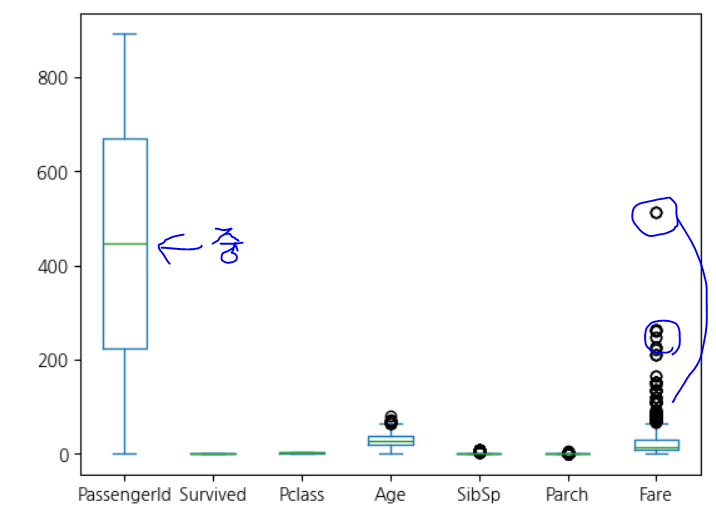
### 변수(도메인)에대한 이해가 중요함<br>ㅇ들이 이상치이지만 나이라든가 가족수 일수도있음(반드시 이상치인건 아님)
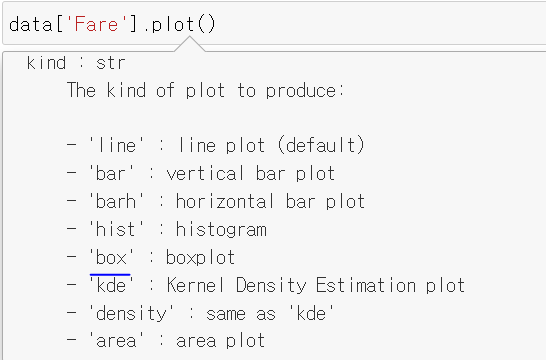

<Axes: >

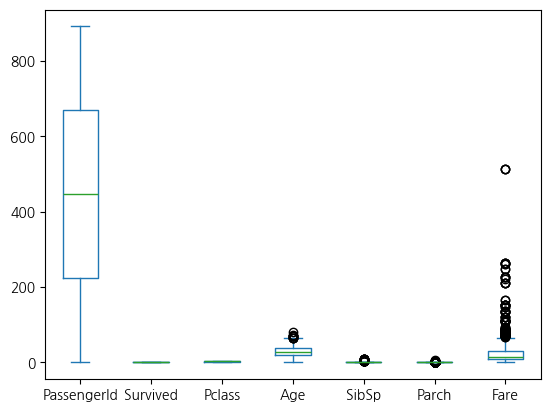

In [13]:
data.plot(kind='box')

In [ ]:
# 보고싶은 컬럼명 쉽게 복붙하기
data.columns

In [ ]:
data[['Age','SibSp','Parch']].plot(kind='box')
# 이상치로 나오는 점들이 존재하지만 
# 어떤 나이도 이상치가 아니다. (부모, 형제 수 또한)
# 도메인에 대한 이해가 있어야한다는게 이런점에서.

In [ ]:
# Z스코어나 표준편차 IQR이용한 계산 방법들 모두 만능이아니라
# 도메인에대한 이해를 바탕으로 이상값여부를 알아볼수있어야함.
data[['Fare']].plot(kind='box')

# 이상치 처리 방법 6가지
| 방법 | 설명 | 주의사항 |
|:----|:----|:----|
| 1. 삭제 (제거) | 이상치인 행(row) 삭제 | 데이터 수가 많을 때만 추천<br> 삭제후 편향될 수 있음주의 |
| 2. 대체 (수정) | 평균, 중앙값 등으로 이상치 값을 대체 | 대체 값이 데이터의 특성을 망가뜨릴 수 있음 |
| 3. 변환 | 로그(log), 루트(sqrt) 변환해서 이상치 영향을 줄이기 | 주로 오른쪽으로 긴 분포(Skewed Data) |
| 4. 구간 압축 (Winsorization) | 상/하위 극단값을 일정 값으로 '컷'<br>정상구간안으로 모아줌 | 통계 왜곡 최소화할 때 사용 |
| 5. 모델링 시 Robust 방법 사용 | 이상치에 강한 모델 사용 (예: RobustScaler, RANSAC) | 이상치를 제거하지 않고 대응 |
| 6. 별도 분석 | 발생원인을 알기. 이상치만 따로 분석해서 인사이트 얻기 | 이상치가 중요한 의미를 가질 때 |

- 4, 5, 6번 방법을 가장 흔하게 사용한다고함.
### winsorization 연습

In [14]:
maximum2 #보다 큰 값들을 이값으로 바꾸기

np.float64(65.6344)

In [15]:
outlier_iqr.loc[:,'Fare'] = maximum2
outlier_iqr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,65.6344,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,65.6344,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,65.6344,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,65.6344,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,65.6344,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,65.6344,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,65.6344,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,65.6344,NaN,S


In [16]:
outlier_iqr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,65.6344,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,65.6344,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,65.6344,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,65.6344,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,65.6344,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,65.6344,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,65.6344,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,65.6344,NaN,S


In [17]:
# 맥시멈에서 벗어난 값들 보기'
data.loc[data['Fare'] > maximum2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [18]:
# 맥시멈에서 벗어난 값들 보기''
data.loc[data['Fare'] > maximum2, 'Fare']

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

In [19]:
# 맥시멈에서 벗어난 값들 보기''' 인덱스 조회
outlier_idx= data.loc[data['Fare'] > maximum2, 'Fare'].index

In [20]:
# 맥시멈에서 벗어난 값들 보기'''' 
outlier_idx= data.loc[data['Fare'] > maximum2, 'Fare']=maximum2

#### Fare컬럼은 몇등실인지에 따라 달라지기 때문에 이상치인지 확인하려면 Pclass 값별로 이상치를 다시 확인해야. <br> 위 작업은 전체를 대상으로 한것이므로 다른변수와의 관계도 고려해야함.